In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Load flight data
flights_1 = pd.read_csv('flights.csv', header=0, sep=',')

#load airline data
airlines = pd.read_csv('airlines.csv', header=0, sep=',')


#merge airline data to flight data
flights_2 = pd.merge(flights_1, 
                     airlines,  
                     how='left', 
                     left_on='AIRLINE',
                     right_on='IATA_CODE')


#load airport data
airports = pd.read_csv('airports.csv', header=0, sep=',')

#merge airport data to flight data
flights_3 = pd.merge(flights_2, 
                     airports, 
                     how='left', 
                     left_on='ORIGIN_AIRPORT', 
                     right_on='IATA_CODE')


flights_4 = pd.merge(flights_3, 
                     airports, 
                     how='left', 
                     left_on='DESTINATION_AIRPORT', 
                     right_on='IATA_CODE', 
                     suffixes=('_ORIGIN', '_DESTINATION'))

#drop duplicate columns from merging
flights = flights_4.drop(['IATA_CODE_y','IATA_CODE_x','IATA_CODE'],axis = 1)

#rename columns changed in merging
flights = flights.rename(columns = {'AIRLINE_x':'AIRLINE_CODE', 'AIRLINE_y':'AIRLINE_NAME'})

#replace NaN with 0
flights = flights.fillna(0)

flights.head(20)


/Users/hollisnymark/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,AIRPORT_DESTINATION,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,AK,USA,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,CA,USA,33.94254,-118.40807,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,CA,USA,37.61900,-122.37484,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,CA,USA,33.94254,-118.40807,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,WA,USA,47.44898,-122.30931,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,CA,USA,37.61900,-122.37484,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,NV,USA,36.08036,-115.15233,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,CA,USA,33.94254,-118.40807,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,CA,USA,37.61900,-122.37484,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,NV,USA,36.08036,-115.15233,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,33.64044,-84.42694


In [4]:
#Create Name friendly columns
DayOfWeek = {1: 'Monday', 
             2: 'Tuesday', 
             3: 'Wednesday', 
             4: 'Thursday', 
             5: 'Friday', 
             6: 'Saturday', 
             7: 'Sunday'}

MonthName = {1: 'January', 
              2: 'February', 
              3: 'March', 
              4: 'April', 
              5: 'May', 
              6: 'June', 
              7: 'July', 
              8: 'August', 
              9: 'September', 
              10: 'October', 
              11: 'November', 
              12: 'December'}

CancellationReason = {'A': 'Airline/Carrier',
                      'B': 'Weather',
                      'C': 'National Air System',
                      'D': 'Security'}

flights['Day_Of_Week'] = flights['DAY_OF_WEEK'].map(lambda x: DayOfWeek[x])
flights['Month_Name'] = flights['MONTH'].map(lambda x: MonthName[x])
flights['Cancellation_Reason'] = flights['CANCELLATION_REASON'].map(lambda x: 'N/A' if x == 0 else CancellationReason[x])


#make dataframe for only cancelled flights
flights_c = flights[flights['CANCELLED']==1]

#make dataframe for flights with departure delays
flights_ddelays = flights[flights['DEPARTURE_DELAY'] > 0]

#make dataframe for flights with arrival delays
flights_adelays = flights[flights['ARRIVAL_DELAY'] > 0]


#makes hourly bins for departure and arrival times format "0000" 
hour_bins = np.arange(0,2500,100)
hour_bins

Hours = np.arange(0,2400,100)

time_columns = ['SCHEDULED_DEPARTURE','DEPARTURE_TIME', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

for i in time_columns:
    flights[i.lower()] = pd.cut(flights[i], 
                                        hour_bins, 
                                        labels=Hours)
    

Bins_to_Hours = {0: '00:00', 
         100: '01:00', 
         200: '02:00',
         300: '03:00',
         400: '04:00', 
         500:'05:00', 
         600:'06:00', 
         700: '07:00', 
         800: '08:00', 
         900: '09:00', 
         1000: '10:00', 
         1100: '11:00', 
         1200: '12:00', 
         1300: '13:00', 
         1400: '14:00', 
         1500: '15:00', 
         1600: '16:00', 
         1700: '17:00', 
         1800: '18:00', 
         1900: '19:00', 
         2000: '20:00', 
         2100: '21:00', 
         2200: '22:00', 
         2300: '23:00'}


flights['Scheduled Departure'] = flights['scheduled_departure'].map(lambda x: Bins_to_Hours[x])
flights['Departure Time'] = flights['departure_time'].map(lambda x: Bins_to_Hours[x])
flights['Scheduled Time'] = flights['scheduled_time'].map(lambda x: Bins_to_Hours[x])
flights['Scheduled Arrival'] = flights['scheduled_arrival'].map(lambda x: Bins_to_Hours[x])
flights['Arrival Time'] = flights['arrival_time'].map(lambda x: Bins_to_Hours[x])


[<matplotlib.text.Text at 0x11191c438>, <matplotlib.text.Text at 0x1118ca400>]

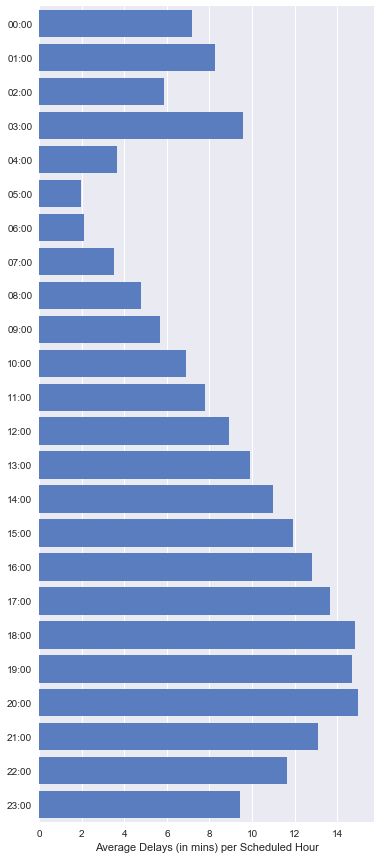

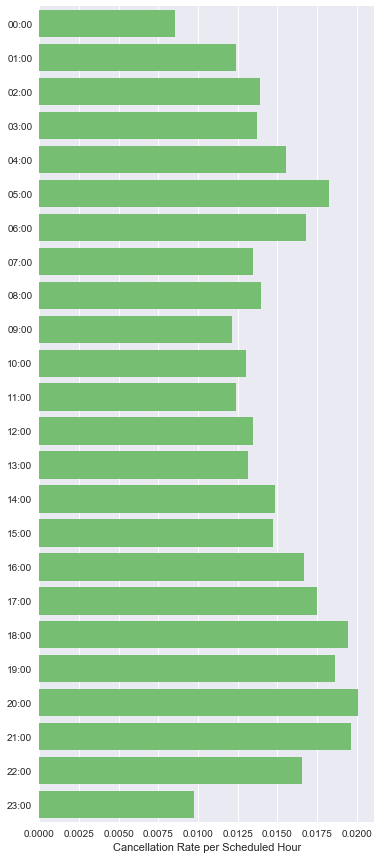

In [6]:
#Departure Time Graphs


S_depart_delays = pd.DataFrame(flights.pivot_table(index = ['Scheduled Departure'], 
                                                   values = 'DEPARTURE_DELAY', 
                                                   aggfunc='mean'))
S_depart_delays = S_depart_delays.reset_index()


S_depart_cans = pd.DataFrame(flights.pivot_table(index = ['Scheduled Departure'], 
                                                   values = 'CANCELLED', 
                                                   aggfunc='mean'))
S_depart_cans = S_depart_cans.reset_index()


#hour of day, average departure delays
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'DEPARTURE_DELAY', 
            y = 'Scheduled Departure',
            data = S_depart_delays, 
            label = 'Average Delays', 
            color="b")
plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)
ax.set(ylabel = "", xlabel = "Average Delays (in mins) per Scheduled Hour")





#hour of day, average cancellations
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'CANCELLED', 
            y = 'Scheduled Departure',
            data = S_depart_cans, 
            label = 'Average Cancellations', 
            color="g")

plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)
ax.set(ylabel = "", xlabel = "Cancellation Rate per Scheduled Hour")

In [33]:
DOW_delays = pd.DataFrame(flights.pivot_table(index = ['DAY_OF_WEEK','Day_Of_Week'], 
                                                   values = 'DEPARTURE_DELAY', 
                                                   aggfunc='mean'))
DOW_delays = DOW_delays.reset_index()
DOW_delays

,DAY_OF_WEEK,Day_Of_Week,DEPARTURE_DELAY
0,1,Monday,10.617359
1,2,Tuesday,9.006004
2,3,Wednesday,8.541097
3,4,Thursday,9.822929
4,5,Friday,9.338719
5,6,Saturday,7.734767
6,7,Sunday,9.257782


[<matplotlib.text.Text at 0x10fd02630>, <matplotlib.text.Text at 0x10fcd3588>]

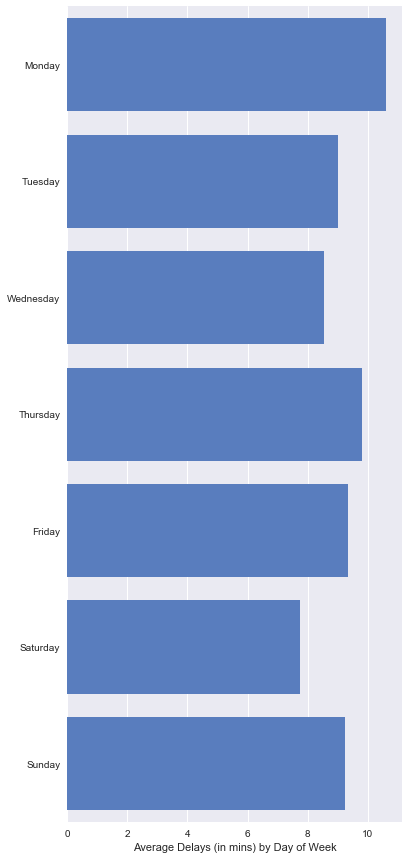

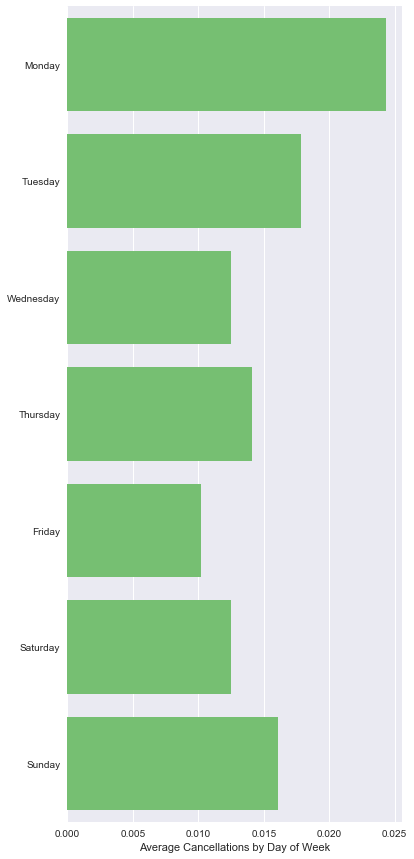

In [7]:
#Day of Week Graphs


DOW_delays = pd.DataFrame(flights.pivot_table(index = ['DAY_OF_WEEK','Day_Of_Week'], 
                                                   values = 'DEPARTURE_DELAY', 
                                                   aggfunc='mean'))
DOW_delays = DOW_delays.reset_index()

#CHECK THIS MATH
DOW_cans = pd.DataFrame(flights.pivot_table(index = ['DAY_OF_WEEK','Day_Of_Week'], 
                                                   values = 'CANCELLED', 
                                                   aggfunc='mean'))
DOW_cans = DOW_cans.reset_index()


#hour of day, average departure delays
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'DEPARTURE_DELAY', 
            y = 'Day_Of_Week',
            data = DOW_delays, 
            label = 'Average Delays', 
            color="b")
plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)
ax.set(ylabel = "", xlabel = "Average Delays (in mins) by Day of Week")


#hour of day, average cancellations
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'CANCELLED', 
            y = 'Day_Of_Week',
            data = DOW_cans, 
            label = 'Average Cancellations', 
            color="g")

plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)

ax.set(ylabel = "", xlabel = "Average Cancellations by Day of Week")

[<matplotlib.text.Text at 0x111f56710>, <matplotlib.text.Text at 0x111f36160>]

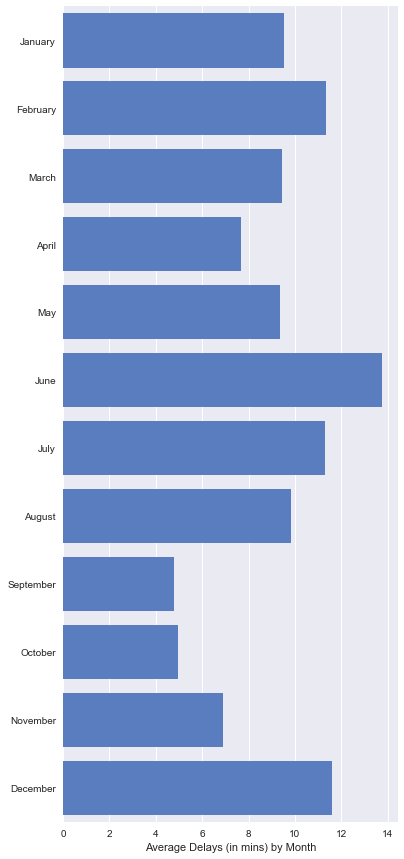

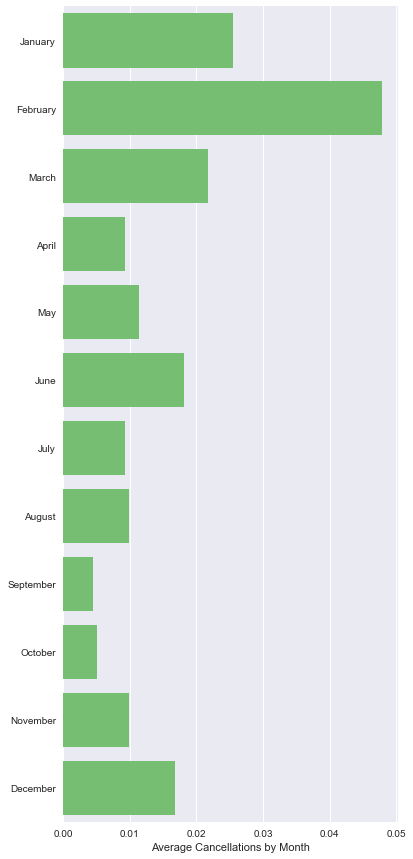

In [8]:
#Month Graphs

MON_delays = pd.DataFrame(flights.pivot_table(index = ['MONTH','Month_Name'], 
                                                   values = 'DEPARTURE_DELAY', 
                                                   aggfunc='mean'))
MON_delays = MON_delays.reset_index()

#CHECK THIS MATH
MON_cans = pd.DataFrame(flights.pivot_table(index = ['MONTH','Month_Name'], 
                                                   values = 'CANCELLED', 
                                                   aggfunc='mean'))
MON_cans = MON_cans.reset_index()


#hour of day, average departure delays
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'DEPARTURE_DELAY', 
            y = 'Month_Name',
            data = MON_delays, 
            label = 'Average Delays', 
            color="b")
plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)
ax.set(ylabel = "", xlabel = "Average Delays (in mins) by Month")


#hour of day, average cancellations
plt.figure(figsize = (6,15))
ax = sns.barplot(x = 'CANCELLED', 
            y = 'Month_Name',
            data = MON_cans, 
            label = 'Average Cancellations', 
            color="g")

plt.figure(figsize=(15,7))
sns.set_color_codes("muted")
sns.set_context(font_scale=2.5)
ax.set(ylabel = "", xlabel = "Average Cancellations by Month")

In [11]:

#FLIGHTS OPERATION

cancelled = flights[flights['CANCELLED'] == 1].count()['CANCELLED']
scheduled = flights.count()['SCHEDULED_DEPARTURE']
operated = scheduled - cancelled

print("Scheduled flights: ", scheduled)
print("Cancelled flights: ", cancelled)
print("Operated flights: ", operated)

Scheduled flights:  5819079
Cancelled flights:  89884
Operated flights:  5729195


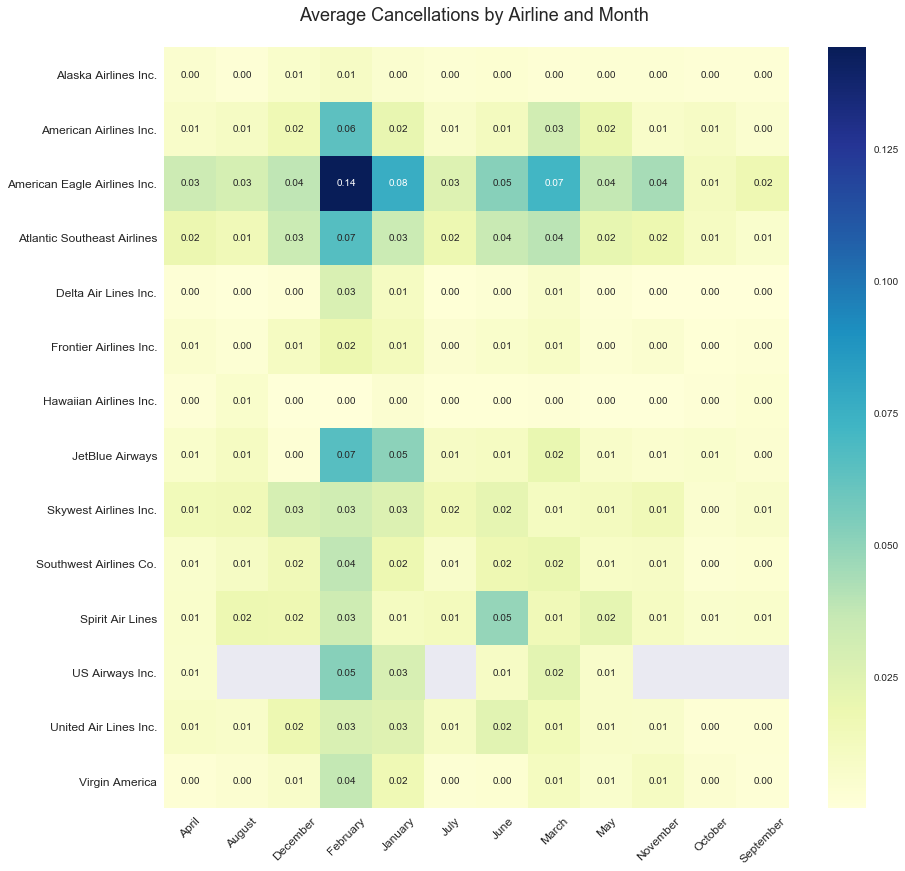

In [34]:
#Time of Year vs. origin Airports avg cancellations heatmap


Airline_Month_AvgCancels = flights.pivot_table(index = ['AIRLINE_NAME'], 
                    columns = 'Month_Name', 
                    values = 'CANCELLED',
                    aggfunc='mean')


plt.figure(figsize = (14,14))
sns.heatmap(Airline_Month_AvgCancels, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.title('Average Cancellations by Airline and Month \n', fontsize = 18)

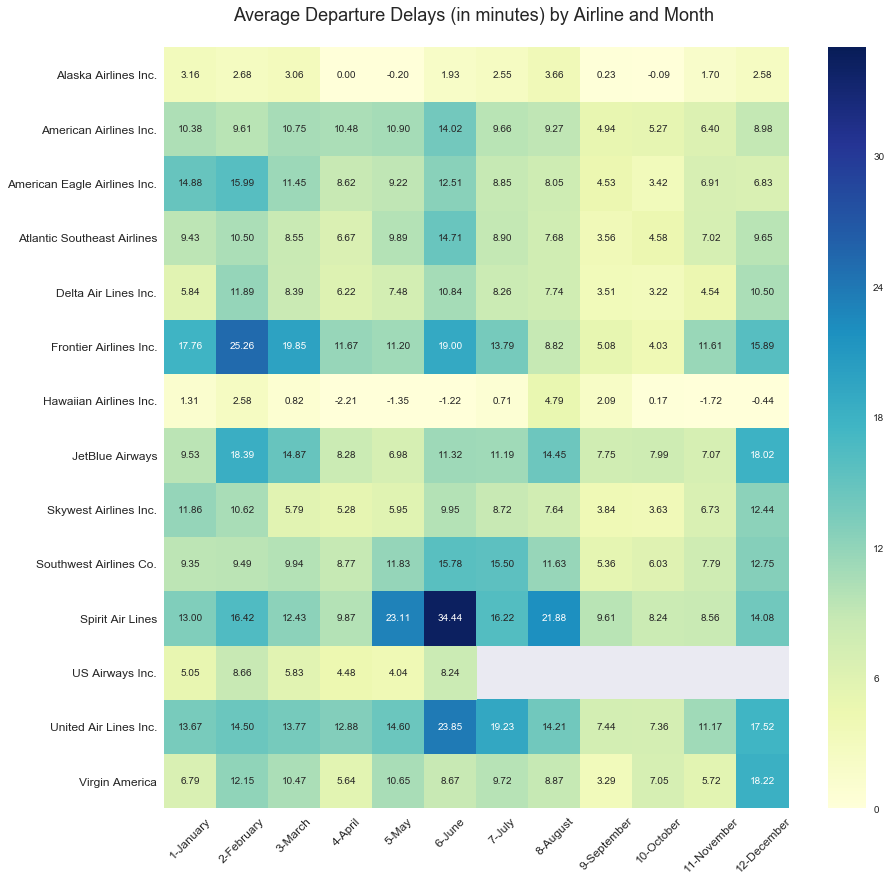

In [99]:
#Time of Year vs. Airline avg departure delays heatmap


Airline_Month_AvgDepDel = flights.pivot_table(index = ['AIRLINE_NAME'], 
                    columns = ['MONTH','Month_Name'], 
                    values = 'DEPARTURE_DELAY',
                    aggfunc='mean')


plt.figure(figsize = (14,14))
sns.heatmap(Airline_Month_AvgDepDel, vmin=0, vmax=35, annot=True, 
            cmap="YlGnBu", fmt=".2f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.title('Average Departure Delays (in minutes) by Airline and Month \n', fontsize = 18)

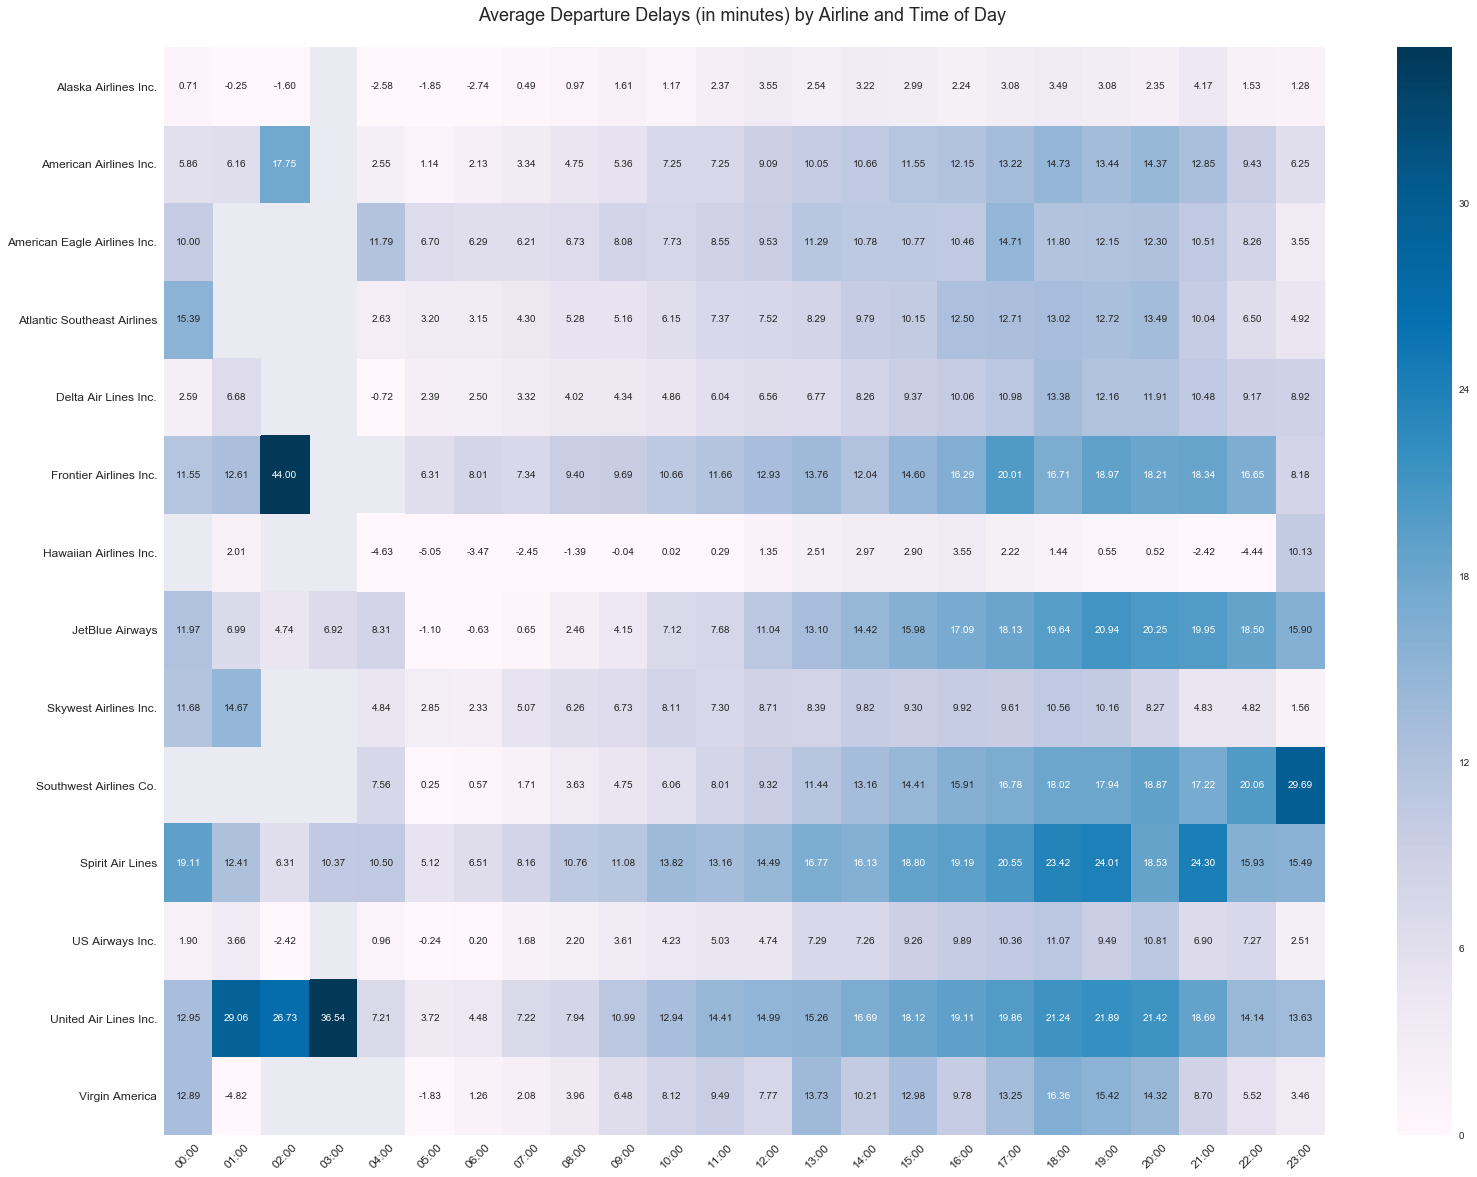

In [55]:
#Time of Day vs. Airline avg departure delays heatmap


Airline_TimeOfDay_AvgDepDel = flights.pivot_table(index = ['AIRLINE_NAME'], 
                    columns = 'Scheduled Departure', 
                    values = 'DEPARTURE_DELAY',
                    aggfunc='mean')


plt.figure(figsize = (26,20))
sns.heatmap(Airline_TimeOfDay_AvgDepDel, vmin=0, vmax=35, annot=True, 
            cmap="PuBu", fmt=".2f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.title('Average Departure Delays (in minutes) by Airline and Time of Day \n', fontsize = 18)

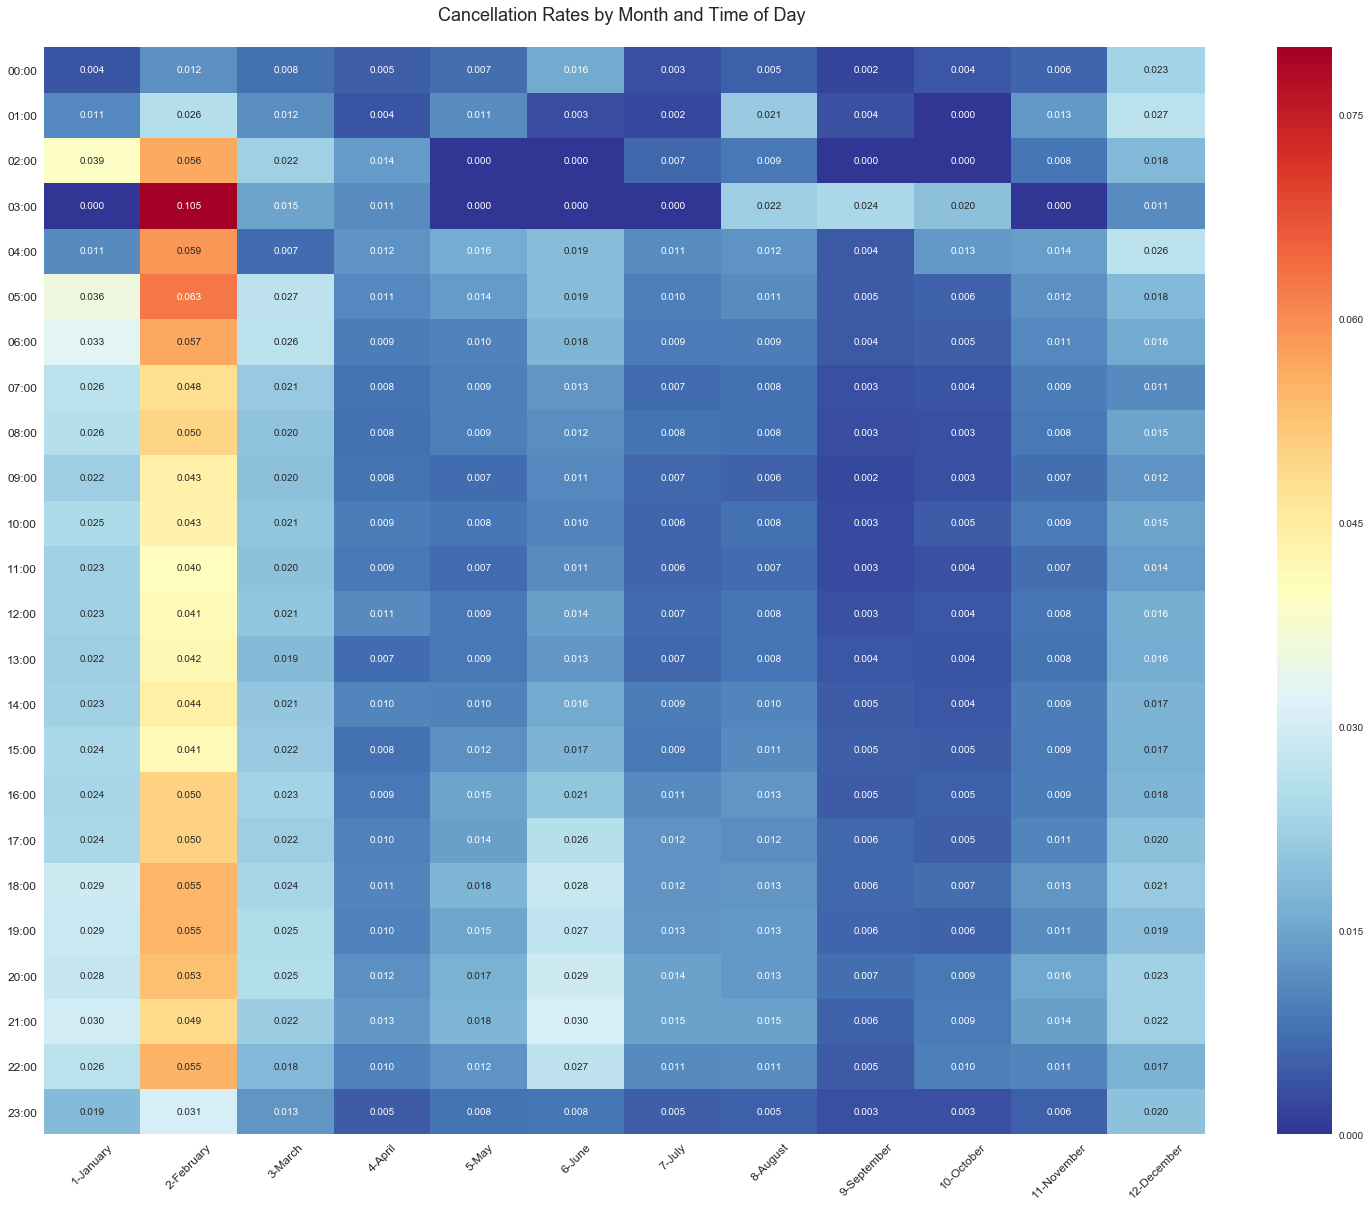

In [85]:
#Time of Year vs. Time of Day - avg. cancellations heatmap


Month_TimeOfDay_AvgCan = flights.pivot_table(index=['Scheduled Departure'], 
                                columns=['MONTH','Month_Name'], 
                                values='CANCELLED',aggfunc='mean')



plt.figure(figsize = (26,20))
sns.heatmap(Month_TimeOfDay_AvgCan, vmin=0, vmax=0.08, annot=True, 
            cmap="RdYlBu_r", fmt=".3f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(rotation=0,fontsize = 12) 
plt.title('Cancellation Rates by Month and Time of Day \n', fontsize = 18)




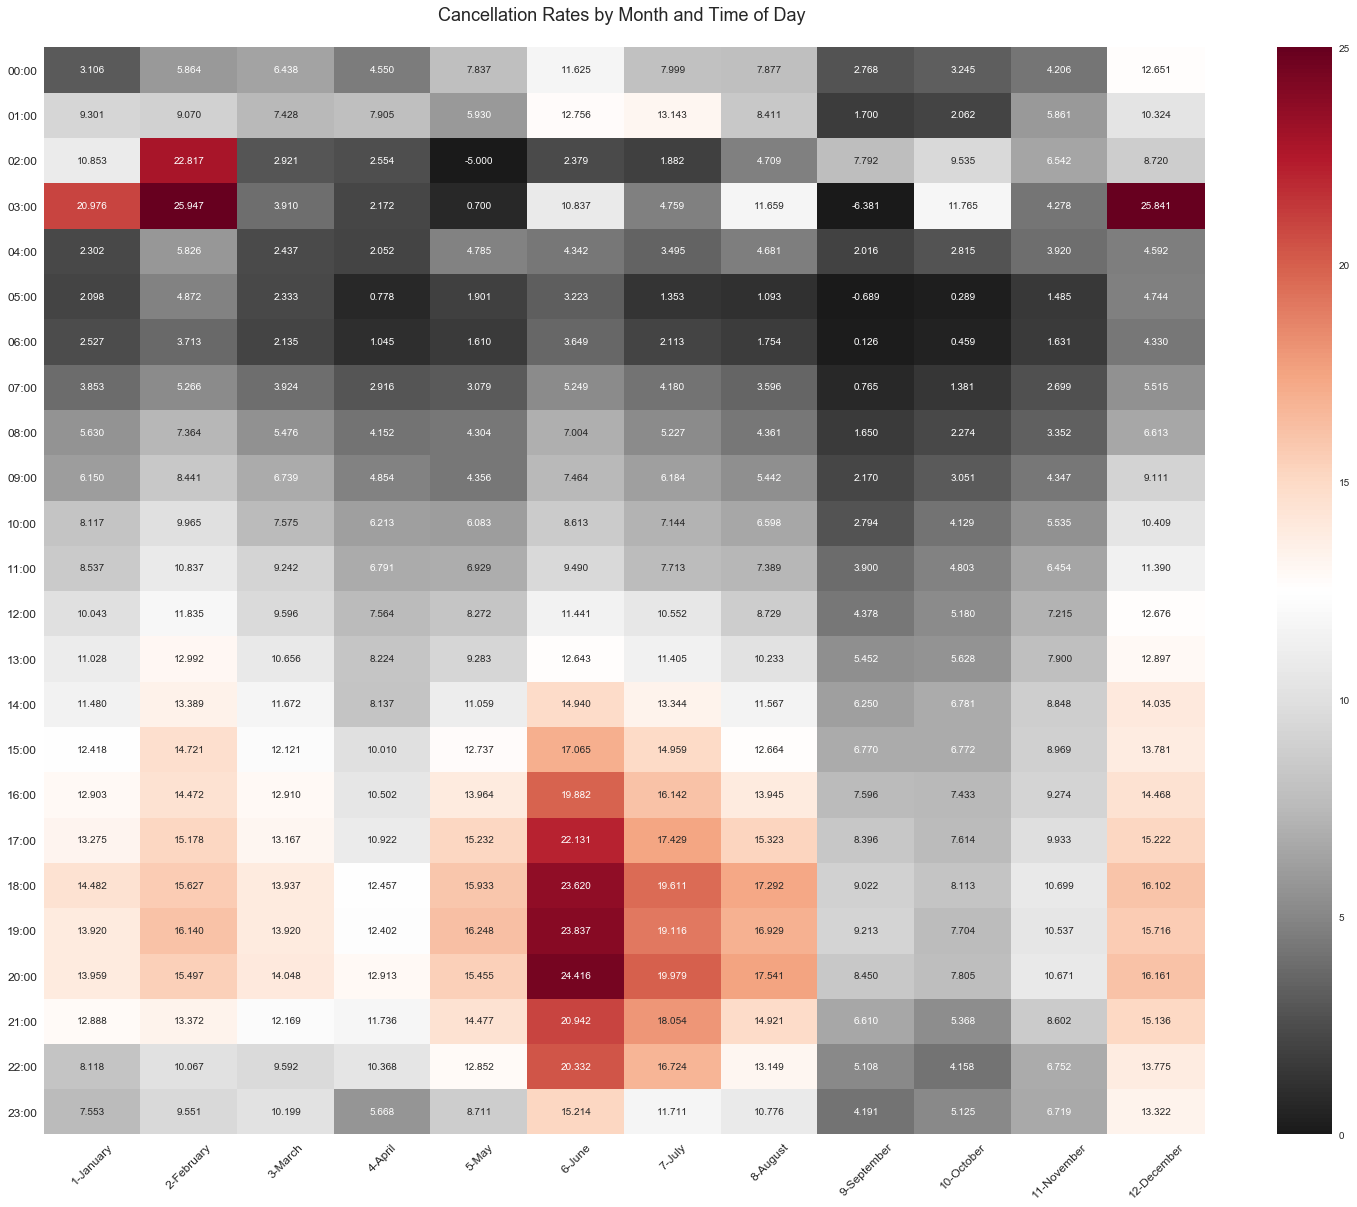

In [98]:
#Time of Year vs. Time of Day - avg. depature delays heatmap

Month_TimeOfDay_AvgDepDelay = flights.pivot_table(index=['Scheduled Departure'], 
                                columns=['MONTH','Month_Name'], 
                                values='DEPARTURE_DELAY',aggfunc='mean')



plt.figure(figsize = (26,20))
sns.heatmap(Month_TimeOfDay_AvgDepDelay, vmin=0, vmax=25, annot=True, 
            cmap="RdGy_r", fmt=".3f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(rotation=0,fontsize = 12) 
plt.title('Cancellation Rates by Month and Time of Day \n', fontsize = 18)


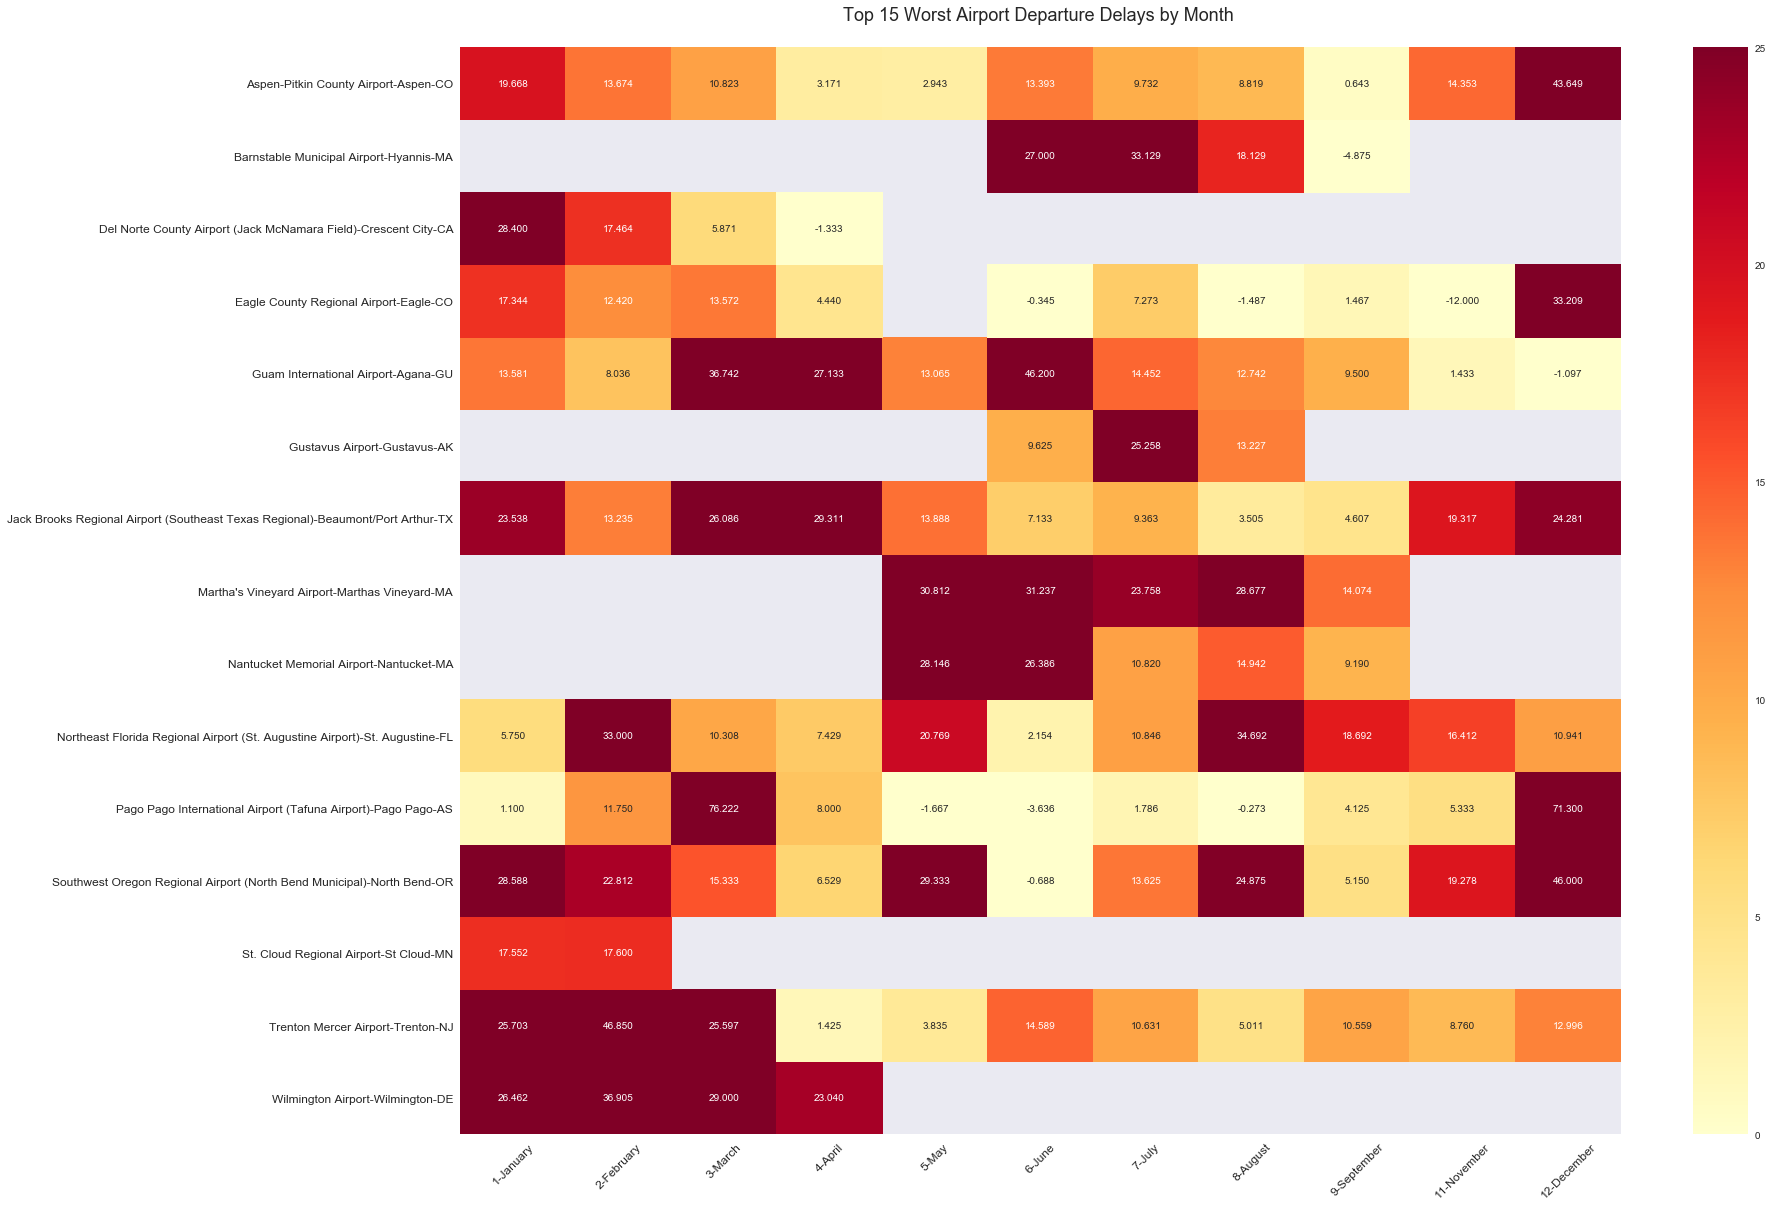

In [149]:
#Time of Year vs. Airports Origin

Airports_WorstDepDelay = list((flights.groupby(['AIRPORT_ORIGIN'])
                               ['DEPARTURE_DELAY'].mean().sort_values(
                                   ascending = False)[0:15]).index)
Airports_WorstDepDelay_DF = flights[flights['AIRPORT_ORIGIN'].isin(Airports_WorstDepDelay)]

Month_WorstAirports_AvgDepDelay = Airports_WorstDepDelay_DF.pivot_table(index=['AIRPORT_ORIGIN','CITY_ORIGIN', 'STATE_ORIGIN'], 
                                columns=['MONTH','Month_Name'], 
                                values='DEPARTURE_DELAY',aggfunc='mean')



plt.figure(figsize = (26,20))
sns.heatmap(Month_WorstAirports_AvgDepDelay, vmin=0, vmax=25, annot=True, 
            cmap="YlOrRd", fmt=".3f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(rotation=0,fontsize = 12) 
plt.title('Top 15 Worst Airport Departure Delays by Month \n', fontsize = 18)

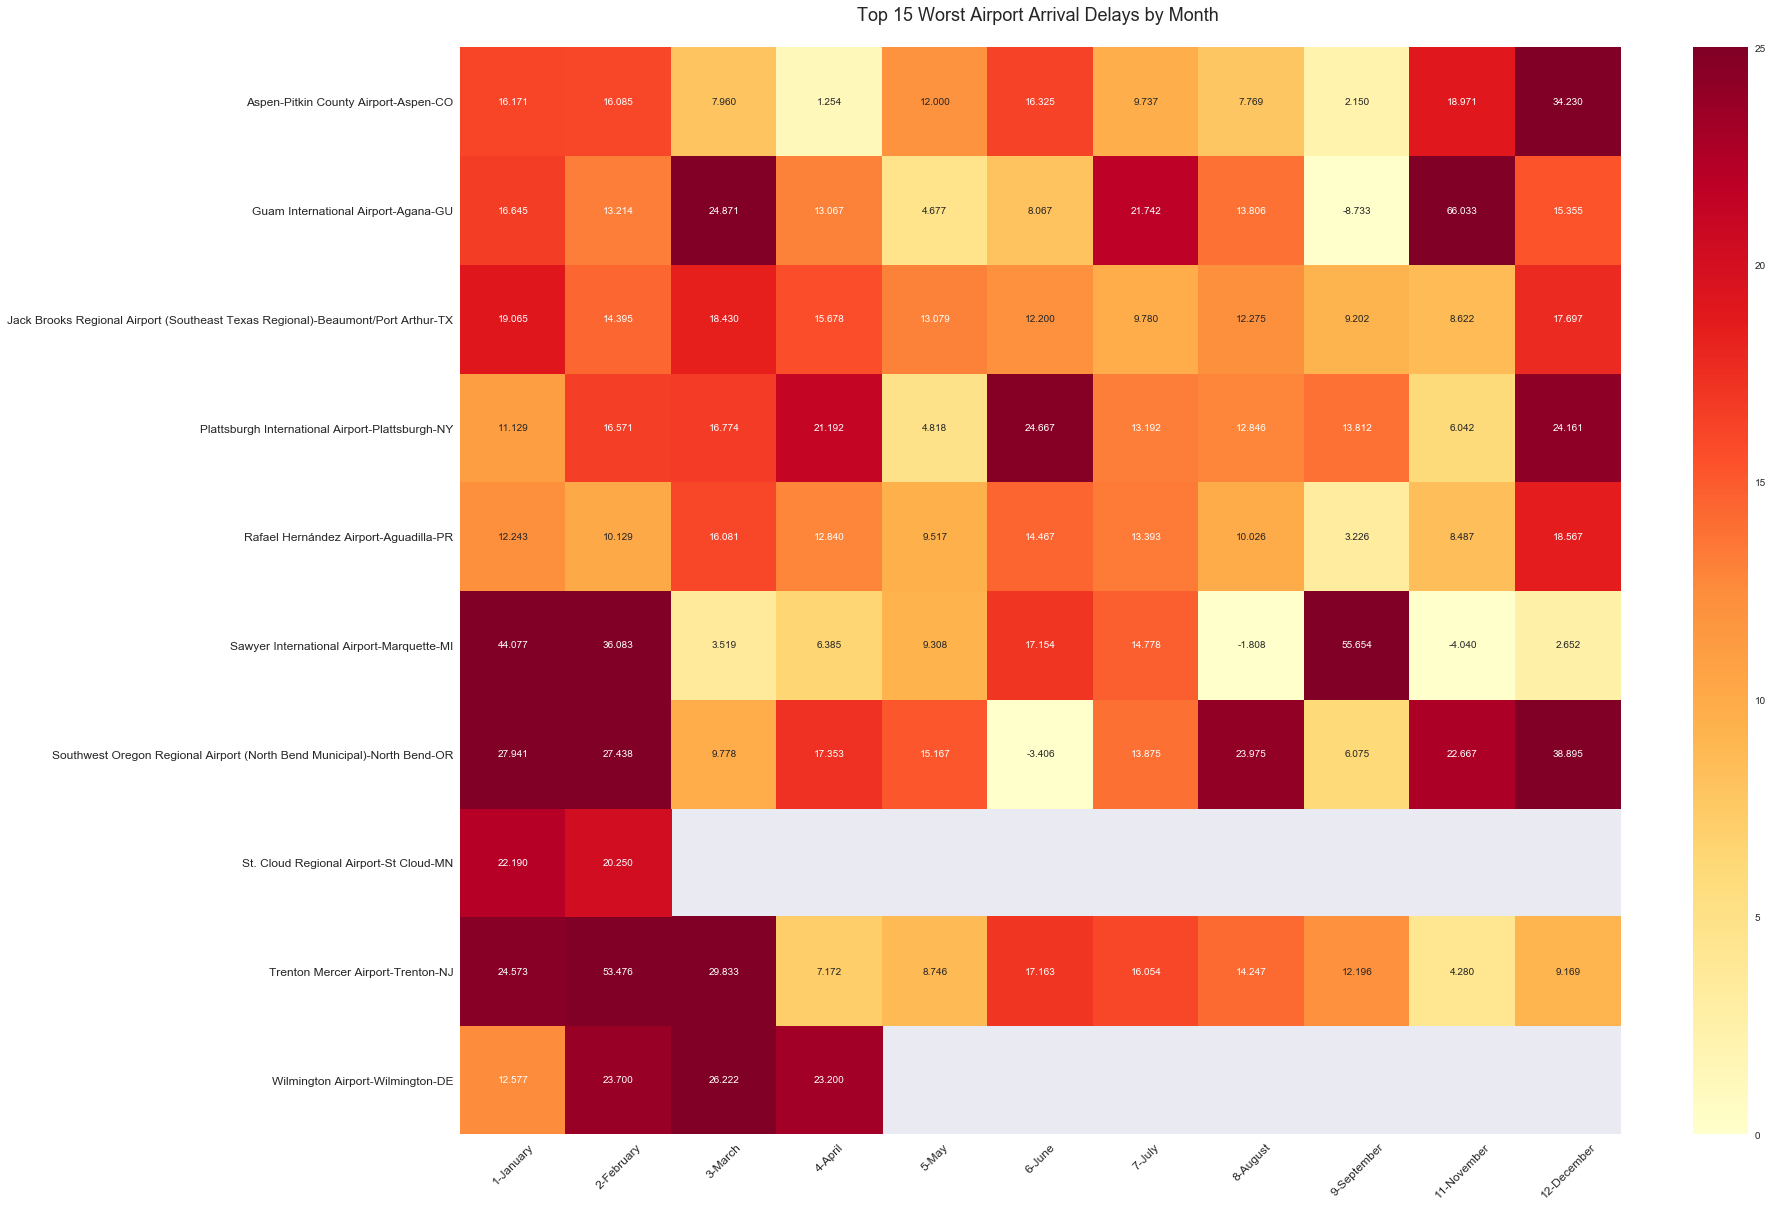

In [150]:
#Time of Year vs. Airports Destination

Airports_WorstArrDelay = list((flights.groupby(['AIRPORT_DESTINATION'])
['ARRIVAL_DELAY'].mean().sort_values(ascending = False)[0:10]).index)
Airports_WorstArrDelay_DF = flights[flights['AIRPORT_DESTINATION'].isin(Airports_WorstArrDelay)]



Month_WorstAirports_AvgArrDelay = Airports_WorstArrDelay_DF.pivot_table(index=['AIRPORT_DESTINATION','CITY_DESTINATION', 'STATE_DESTINATION'], 
                                columns=['MONTH','Month_Name'], 
                                values='ARRIVAL_DELAY',aggfunc='mean')



plt.figure(figsize = (26,20))
sns.heatmap(Month_WorstAirports_AvgArrDelay, vmin=0, vmax=25, annot=True, 
            cmap="YlOrRd", fmt=".3f")
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.xticks(rotation=45,fontsize = 12) 
plt.yticks(rotation=0,fontsize = 12) 
plt.title('Top 15 Worst Airport Arrival Delays by Month \n', fontsize = 18)